In [1]:
import os
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import seaborn as sns
from keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
# iz skupa gde su uklonjene slike
train_dir='C:/Users/Djole/Desktop/slike/train'
test_dir='C:/Users/Djole/Desktop/slike/test'
klase=['angry','disgust','fear','happy','neutral','sad','surprise']

br_klasa=len(klase)
print(br_klasa)

7


In [3]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    #rescale=1./255,
    preprocessing_function=preprocess_input,
    horizontal_flip = True,
    vertical_flip= True,
    width_shift_range = [0.1,0.2],
    height_shift_range = [0.1,.2],
)
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    #rescale=1./255
    preprocessing_function=preprocess_input,
)

In [4]:

train_skup = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(224,224),
                                             )
val_skup = image_dataset_from_directory(test_dir,
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(224,224),
                                             )

Found 28662 files belonging to 7 classes.
Found 7165 files belonging to 7 classes.


In [5]:
print(os.path.exists(train_dir))
print(os.path.exists(test_dir))

True
True


In [6]:
model=keras.Sequential()
bazni_model=keras.applications.ResNet152(weights='imagenet',
                                               include_top=False,
                                               input_shape=(224, 224, 3),
                                               )
bazni_model.trainable = False

model.add(bazni_model)
model.add(keras.layers.GlobalAveragePooling2D())

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1024,activation= 'relu'))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dropout(.35))

model.add(keras.layers.Dense(br_klasa,activation='softmax'))

print(model.summary())

#optimizer=keras.optimizers.Adam(learning_rate = 0.01, momentum = 0.9, nesterov = True)
model.compile(optimizer=keras.optimizers.SGD(learning_rate = 0.001),loss="sparse_categorical_crossentropy",metrics=['accuracy'])
                                                                        
history=model.fit(train_skup,epochs=30,validation_data=val_skup,verbose=1)

#cuvanje modela u keras formatu(novi format koji koristim umesto h5)
model.save('C:/Users/Djole/Desktop/Resnet152.keras')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet152 (Functional)               │ ?                           │      58,370,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,370,944 (222.67 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 58,370,944 (222.67 MB)

None
Epoch 1/30
896/896 ━━━━━━━━━━━━━━━━━━━━ 2187s 2s/step - accuracy: 0.2988 - loss: 1.7950 - val_accuracy: 0.4324 - val_loss: 1.4965
Epoch 2/30
896/896 ━━━━━━━━━━━━━━━━━━━━ 2142s 2s/step - accuracy: 0.4203 - loss: 1.5123 - val_accuracy: 0.4565 - val_loss: 1.4290
Epoch 3/30
896/896 ━━━━━━━━━━━━━━━━━━━━ 2128s 2s/step - accuracy: 0.4438 - loss: 1.4512 - val_accuracy: 0.4695 - val_loss: 1.3945
Epoch 4/30
896/896 ━━━━━━━━━━━━━━━━━━━━ 2132s 2s/step - accuracy: 0.4661 - loss: 1.4123 - val_accuracy: 0.4777 - val_loss: 1.3713
Epoch 5/30
896/896 ━━━━━━━━━━━━━━━━━━━━ 2129s 2s/step - accuracy: 0.4778 - loss: 1.3826 - val_accuracy: 0.4863 - val_loss: 1.3463
Epoch 6/30
896/896 ━━━━━━━━━━━━━━━━━━━━ 2137s 2s/step - accuracy: 0.4860 - loss: 1.3550 - val_accuracy: 0.4916 - val_loss: 1.3308
Epoch 7/30
896/896 ━━━━━━━━━━━━━━━━━━━━ 2138s 2s/step - accuracy: 0.4916 - loss: 1.3425 - val_accuracy: 0.4896 - val_loss: 1.3288
Epoch 8/30
896/896 ━━━━━━━━━━━━━━━━━━━━ 2109s 2s/step - accuracy: 0.4981 - loss: 1.32

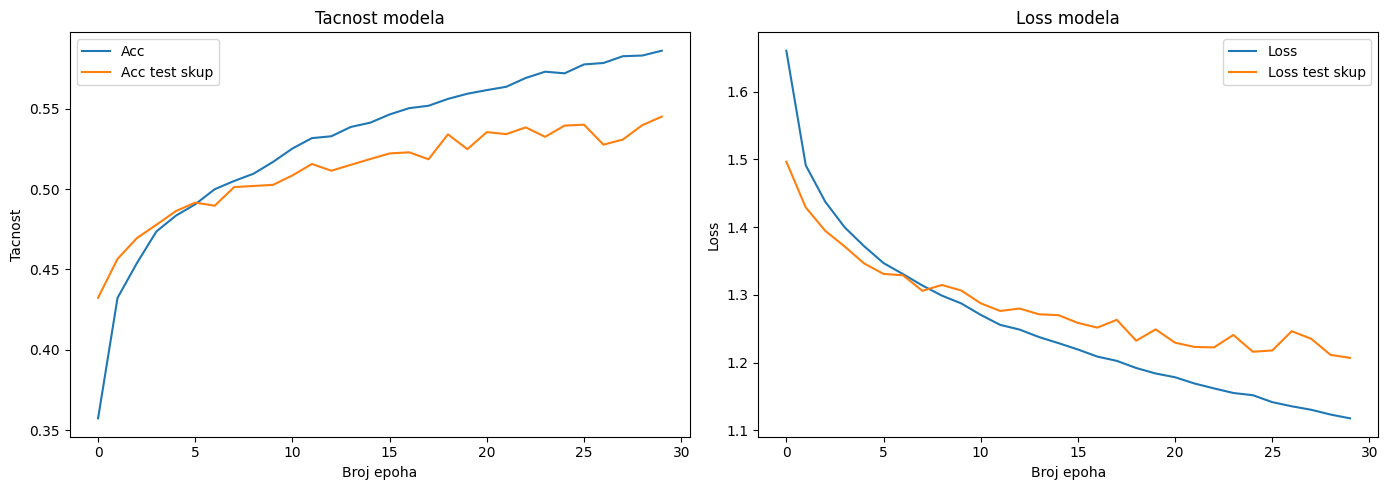

In [7]:
plt.figure(figsize=(14, 5))

#Acc
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acc')
plt.plot(history.history['val_accuracy'], label='Acc test skup')
plt.xlabel('Broj epoha')
plt.ylabel('Tacnost')
plt.title('Tacnost modela')
plt.legend()

#loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Loss test skup')
plt.xlabel('Broj epoha')
plt.ylabel('Loss')
plt.title('Loss modela')
plt.legend()

plt.tight_layout()
plt.show()